In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\user\Desktop\data source\iriss.csv')

In [3]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   species          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length_cm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width_cm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length_cm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width_cm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [7]:
for col in df.columns:
    unique_values = df[col].nunique()
    print(f'{col}:{unique_values}')

sepal_length_cm:35
sepal_width_cm:23
petal_length_cm:43
petal_width_cm:22
species:3


In [8]:
num_col = [col for col in df.columns if df.dtypes[col] !='O']
num_col

['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']

In [9]:
cat_col = [col for col in df.columns if df.dtypes[col] =='O']
cat_col

['species']

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: xlabel='species', ylabel='count'>

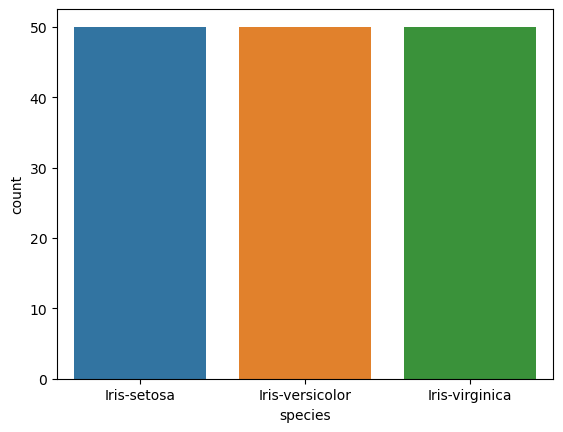

In [12]:
sns.countplot(data = df, x = 'species')

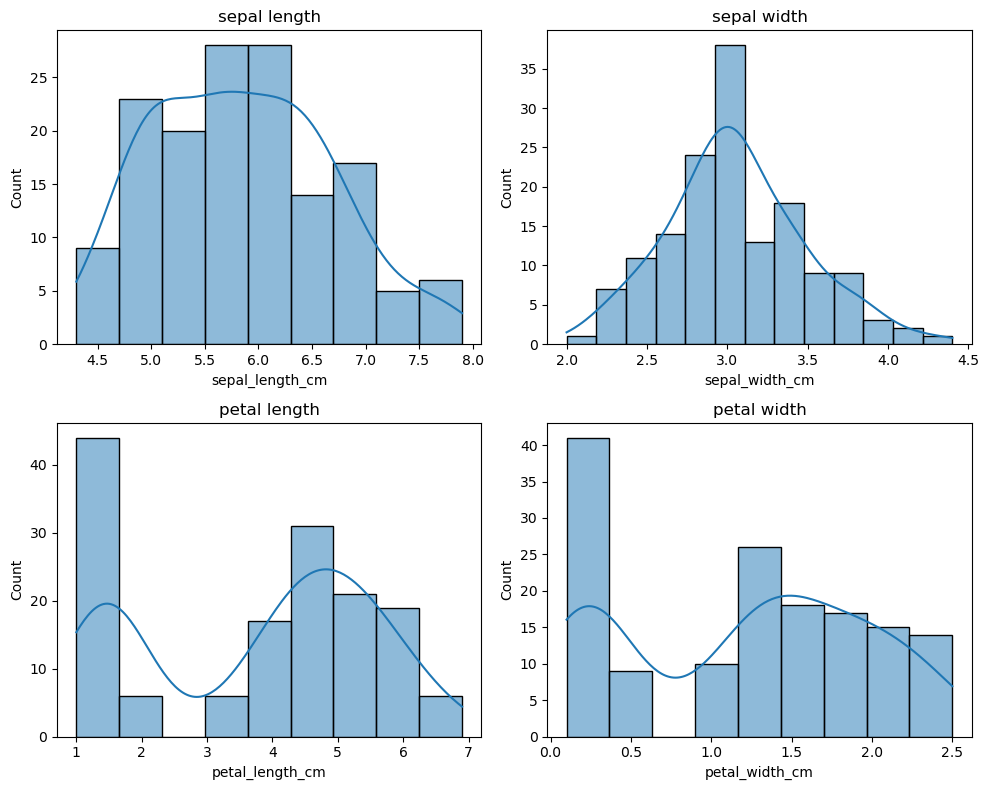

In [13]:
# create a subplot 2 by 2 grid
fig,axes = plt.subplots(2,2,figsize = (10,8))

sns.histplot(df['sepal_length_cm'], kde = True, ax = axes[0,0])
axes[0,0].set_title('sepal length')

sns.histplot(df['sepal_width_cm'], kde = True, ax = axes[0,1])
axes[0,1].set_title('sepal width')

sns.histplot(df['petal_length_cm'], kde = True, ax = axes[1,0])
axes[1,0].set_title('petal length')

sns.histplot(df['petal_width_cm'], kde = True, ax = axes[1,1])
axes[1,1].set_title('petal width')

plt.tight_layout()
plt.show()

<Axes: xlabel='sepal_length_cm', ylabel='sepal_width_cm'>

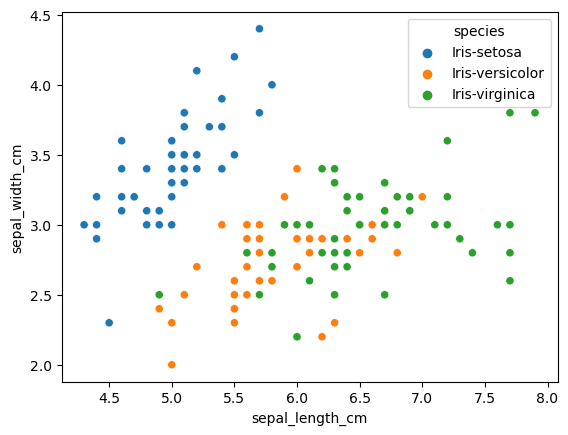

In [14]:
sns.scatterplot(data = df, x = 'sepal_length_cm', y = 'sepal_width_cm', hue = 'species')

<Axes: xlabel='petal_length_cm', ylabel='petal_width_cm'>

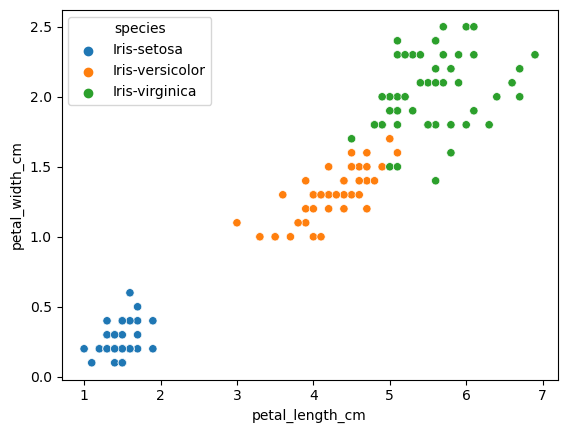

In [15]:
sns.scatterplot(data = df, x = 'petal_length_cm', y = 'petal_width_cm', hue = 'species')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


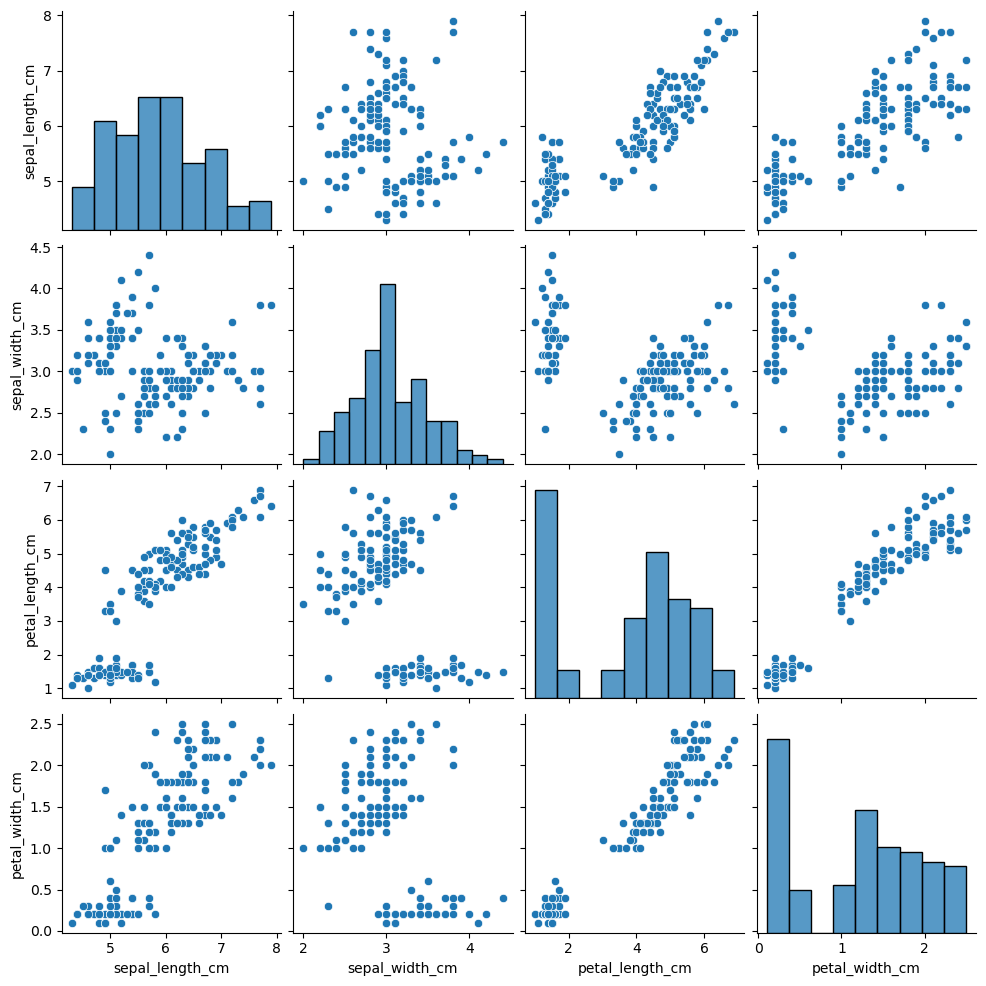

In [16]:
sns.pairplot(data = df)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


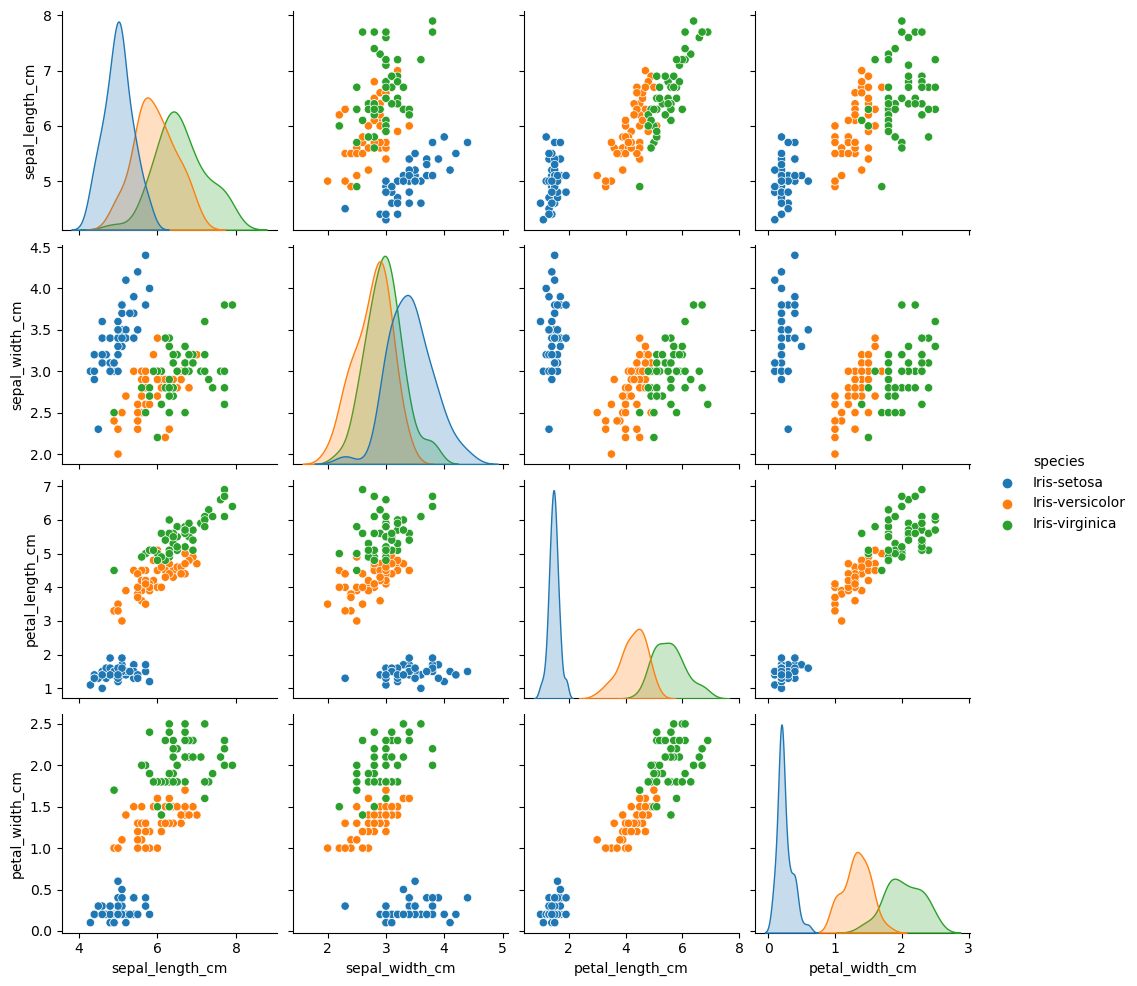

In [17]:
sns.pairplot(data = df, hue = 'species')

<Axes: xlabel='sepal_length_cm', ylabel='petal_length_cm'>

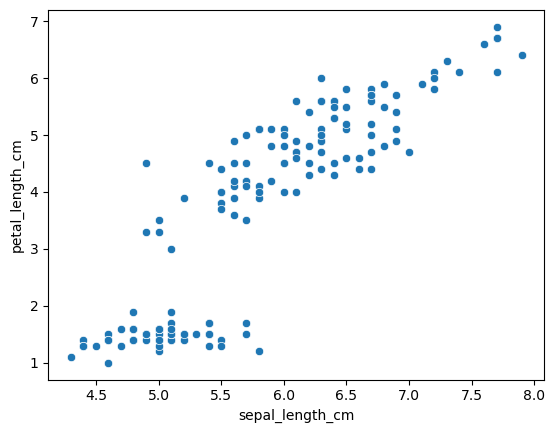

In [18]:
sns.scatterplot(data = df, x = 'sepal_length_cm', y = 'petal_length_cm')

In [28]:
# To take out the non numeric content to allow for df.corr()
my_df = df.select_dtypes(exclude = [object])

In [26]:
my_df.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,-0.109369,0.871754,0.817954
sepal_width_cm,-0.109369,1.000000,-0.420516,-0.356544
petal_length_cm,0.871754,-0.420516,1.000000,0.962757
petal_width_cm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

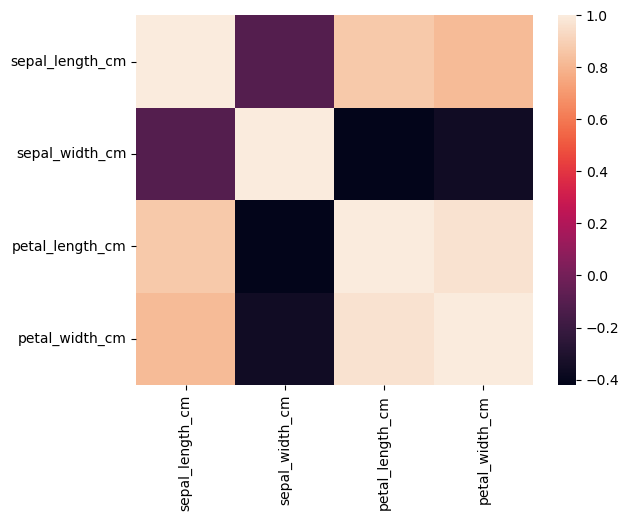

In [27]:
sns.heatmap(my_df.corr())

<Axes: xlabel='sepal_length_cm'>

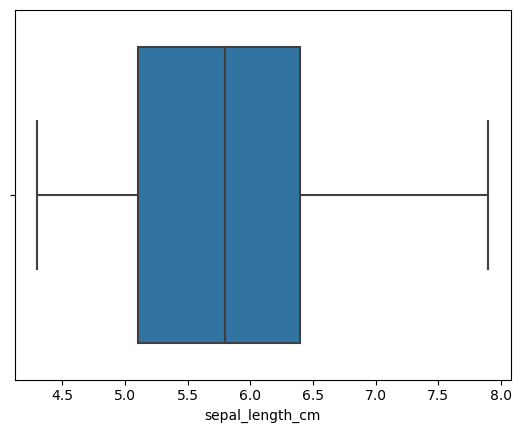

In [21]:
sns.boxplot(data = df, x = 'sepal_length_cm')

<Axes: xlabel='sepal_length_cm', ylabel='species'>

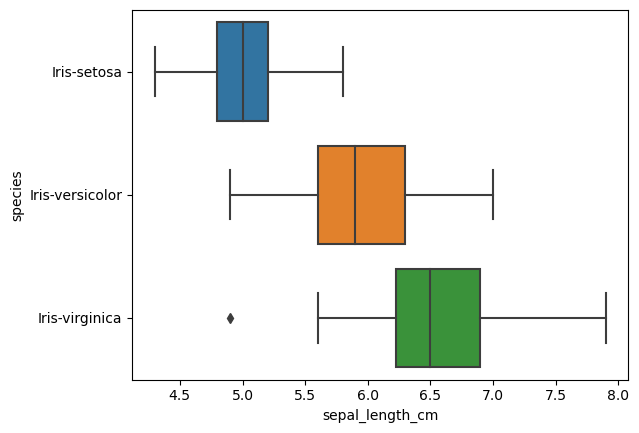

In [22]:
sns.boxplot(data = df, y = 'species', x = 'sepal_length_cm')

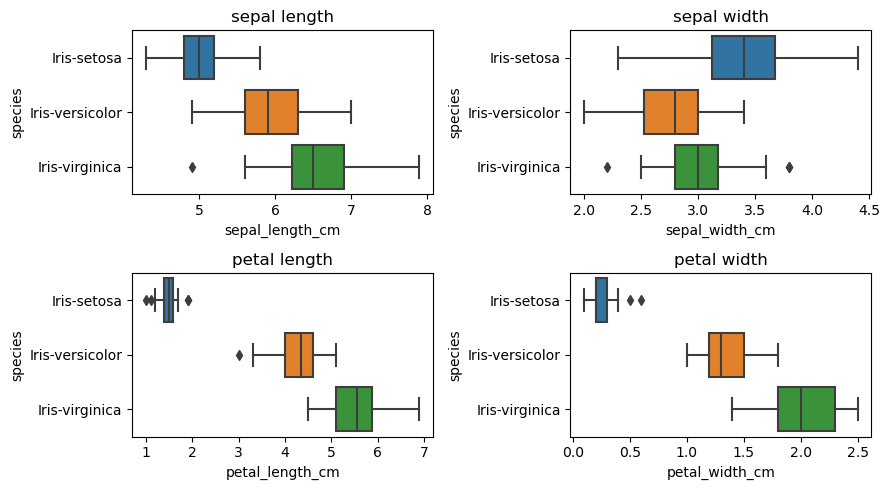

In [23]:
# create a subplot 2 by 2 grid
fig,axes = plt.subplots(2,2,figsize = (9,5))

sns.boxplot(data = df, y ='species', x = 'sepal_length_cm', ax = axes[0,0])
axes[0,0].set_title('sepal length')

sns.boxplot(data = df, y ='species', x = 'sepal_width_cm', ax = axes[0,1])
axes[0,1].set_title('sepal width')

sns.boxplot(data = df, y ='species', x = 'petal_length_cm', ax = axes[1,0])
axes[1,0].set_title('petal length')

sns.boxplot(data = df, y ='species', x = 'petal_width_cm', ax = axes[1,1])
axes[1,1].set_title('petal width')

plt.tight_layout()
plt.show()